# Trabalho prático da disciplina Mineração de Dados

## Alunos:
- ### Pedro Augusto Sousa Gonçalves, 21.1.4015
- ### Tiago Gomes da Silva - 19.2.4009

#### Dataset: https://www.kaggle.com/competitions/march-machine-learning-mania-2025
#### Repositorio: https://github.com/pedroasgDEV/NCAA_DataMine

Importando os arquivos de dados

## 1. Introdução

O torneio de basquete masculino universitário dos Estados Unidos conhecido como March Madness é uma competição de eliminação direta com altíssimo grau de imprevisibilidade, onde 68 times universitários da 1.ª divisão da NCAA competem por meio de confrontos intensos, muitas vezes decididos por margens estreitas. A competição "March Machine Learning Mania 2025" do Kaggle propõe um problema de mineração de dados que visa aplicar técnicas de aprendizado de máquina para prever os resultados dos jogos do torneio utilizando dados históricos e estatísticas das equipes.

### 1.1 Motivação

A aplicação da mineração de dados em esportes, especialmente no torneio March Madness, apresenta um cenário desafiador devido à complexidade do domínio, marcada por fatores como variações de desempenho, estilos de jogo, lesões, formato de eliminação direta e aleatoriedade. Dessa forma, trata-se de um contexto ideal para testar e aplicar as técnicas apresentadas ao longo do curso.

### 1.2 Objetivo do Trabalho

O objetivo principal é desenvolver modelos preditivos capazes de estimar a probabilidade de vitória de todos os possíveis confrontos do torneio March Madness de 2025. Devido ao caráter eliminatório direto, o problema exige que todas as possibilidades sejam consideradas, mesmo aqueles confrontos que nunca irão ocorrer. As previsões devem ser probabilísticas, refletindo a incerteza inerente a cada possível confronto.

## 2. Materiais e Métodos

### 2.1 Bibliotecas Utilizadas

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

### 2.2 Dados usados

In [245]:
data_path = "march-machine-learning-mania-2025/"
teams = pd.read_csv(data_path + 'MTeams.csv')
seasons = pd.read_csv(data_path + 'MSeasons.csv')
tourneySeeds = pd.read_csv(data_path + 'MNCAATourneySeeds.csv')
tourneySlots = pd.read_csv(data_path + 'MNCAATourneySlots.csv')
regularSeasonResults = pd.read_csv(data_path + 'MRegularSeasonDetailedResults.csv')
tourneyResults = pd.read_csv(data_path + 'MNCAATourneyDetailedResults.csv')

#### 2.2.1 Times (*MTeams.csv*)

O arquivo *MTeams.csv* armazena todos os times universitários masculinos presentes no dataset.

In [246]:
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


- **TeamsID** (*Identificador*): Valor numérico unico que identifica cada time.
- **TeamName** (*Categórico Nominal*): Nome de cada time presente no dataset.
- **FirstD1Season** (*Quantitativo Discreto*): O ano da primeira vez que o time esteve na 1.ª divisão.
- **LastD1Season** (*Quantitativo Discreto*): O ano da última vez que o time esteve na 1.ª divisão.

#### 2.2.2 Temporadas (*MSeasons.csv*)

Esse arquivo identifica as temporadas presentes nos dados históricos presentes no dataset.

In [247]:
seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


- **Season** (*identificador / Quantitativo Discreto*): O ano em que finalizou a temporada
- **DayZero** (*Categórico Ordinal*): O dia do primeiro jogo da temporada
- **RegionW** (*Categórico Nominal*): Uma das quatro regiões do torneio
- **RegionX** (*Categórico Nominal*): Uma das quatro regiões do torneio
- **RegionY** (*Categórico Nominal*): Uma das quatro regiões do torneio
- **RegionZ** (*Categórico Nominal*): Uma das quatro regiões do torneio

Nas semifinals a região W joga com a região X e a Y com a Z.

#### 2.2.3 Classificação Inicial (*MNCAATourneySeeds.csv*)

Esse arquivo identifica a posição inicial dos times no torneio em todas as temporadas presentes no dataset.

In [248]:
tourneySeeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


- **Season** (*Referencia*): Referencia a coluna de mesmo nome no arquivo "*MSeasons.csv*".
- **TeamID** (*Referencia*): Referencia a coluna de mesmo nome no arquivo "*MTeams.csv*".
- **Seed** (*Categórico Nominal*): Classificação inicial do time naquela temporada.

A letra inicial da seed representa a região do time (W, X, Y, Z), se tiver letra no final (a ou b) significa que o time está no play-in para aquela posição, são dois por região.

#### 2.2.4 Chaveamento dos Torneios

Esse arquivo apresenta a estrutura do chaveamento de todos os torneios.

In [249]:
tourneySlots.head()

,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


- **Season** (*Referencia*): Referencia a coluna de mesmo nome no arquivo "*MSeasons.csv*".
- **Slot** (*Categórico Nominal*): É o identificador da chave.
- **StrongSeed** (*Categórico Nominal*): É a posição mais forte da chave.
- **WeakSeed** (*Categórico Nominal*): É a posição mais fraca da chave.

A primeira letra acompanhada de um número do slot é a rodada (R1AA significa que é uma chave da rodada 1)
Em Seguida podem ter 4 possibilidades: RRW1, é uma chave da região W, RRWX, é uma chave entre regiões W e X (Final Four), RRCH, é a chave que define o campeão, WPP, é a chave para definir o time da posição PP ma região W (Play-In ou First Four).

#### 2.2.5 Resultado de todos os jogos (*MNCAATourneyDetailedResults.csv* + *MRegularSeasonDetailedResults.csv*)

Esse arquivo apresenta os resultados de todos os jogos presentes no dataset desde 2003.

Antes vou modificar o dataframe, para facilitar a análise. Inicialmente juntando os jogos da temporada regular com os jogos do torneio, e depois adicionar o aproveitamento de cada tipo de arremesso.

In [250]:
#Adicionando coluna para diferenciar a origem dos dados
regularSeasonResults.insert(loc = 2, column= "GType", value="Regular")
tourneyResults.insert(loc = 2, column= "GType", value="Tourney")

gamesResult = pd.concat([regularSeasonResults, tourneyResults], ignore_index=True)
gamesResult = gamesResult.sort_values(by=["Season", "DayNum"])
gamesResult.head()

,Season,DayNum,GType,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,Regular,1104,68,1328,62,N,0,27,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,Regular,1272,70,1393,63,N,0,26,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,Regular,1266,73,1437,61,N,0,24,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,Regular,1296,56,1457,50,N,0,18,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,Regular,1400,77,1208,71,N,0,30,...,16,17,27,21,15,12,10,7,1,14


In [251]:
# Pegando o aproveitamento de cada tipo de arremesso
# Total
gamesResult_FGpercent = gamesResult.copy()
gamesResult_FGpercent["WFG%"] = gamesResult["WFGM"] / gamesResult["WFGA"]
gamesResult_FGpercent["LFG%"] = gamesResult["LFGM"] / gamesResult["LFGA"]

# 2 Pontos
gamesResult_FGpercent["WFG2%"] = (gamesResult["WFGM"] - gamesResult["WFGM3"]) / (gamesResult["WFGA"] - gamesResult_FGpercent["WFGA3"])
gamesResult_FGpercent["LFG2%"] = (gamesResult["LFGM"] - gamesResult["LFGM3"]) / (gamesResult["LFGA"] - gamesResult_FGpercent["LFGA3"])

# 3 Pontos
gamesResult_FGpercent["WFG3%"] = gamesResult["WFGM3"] / gamesResult["WFGA3"]
gamesResult_FGpercent["LFG3%"] = gamesResult["LFGM3"] / gamesResult["LFGA3"]

# Lances Livres
gamesResult_FGpercent["WFT%"] = gamesResult["WFTM"] / gamesResult["WFTA"]
gamesResult_FGpercent["LFT%"] = gamesResult["LFTM"] / gamesResult["LFTA"]

# Se houver alguma divisão por 0, ou seja, sem arremessos tentados, substitui o valor por 0
gamesResult_FGpercent.fillna(0, inplace=True)

# Exclui todas as colunas desnecessárias
gamesResult_FGpercent = gamesResult_FGpercent.drop(["WFGM", "LFGM", "WFGA", "LFGA", "WFGM3", "WFGA3", "LFGM3", "LFGA3", "WFTM", "WFTA", "LFTM", "LFTA"], axis=1)

In [252]:
gamesResult_FGpercent.head()

,Season,DayNum,GType,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WOR,...,LBlk,LPF,WFG%,LFG%,WFG2%,LFG2%,WFG3%,LFG3%,WFT%,LFT%
0,2003,10,Regular,1104,68,1328,62,N,0,14,...,2,20,0.465517,0.415094,0.545455,0.465116,0.214286,0.200000,0.611111,0.727273
1,2003,10,Regular,1272,70,1393,63,N,0,15,...,6,16,0.419355,0.358209,0.428571,0.418605,0.400000,0.250000,0.526316,0.450000
2,2003,11,Regular,1266,73,1437,61,N,0,17,...,5,23,0.413793,0.301370,0.400000,0.404255,0.444444,0.115385,0.586207,0.608696
3,2003,11,Regular,1296,56,1457,50,N,0,6,...,3,23,0.473684,0.367347,0.517241,0.444444,0.333333,0.272727,0.548387,0.533333
4,2003,11,Regular,1400,77,1208,71,N,0,17,...,1,14,0.491803,0.387097,0.510638,0.391304,0.428571,0.375000,0.846154,0.629630


- **Season** (*Referencia*): Referencia a coluna de mesmo nome no arquivo "*MSeasons.csv*"
- **WTeamID** / **LTeamID** (*Referencia*): Referencia a coluna "TeamID" no arquivo "*MTeams.csv*"
- **DayNum** (*Quantitativo Discreto*): O dia a partir do dia 0 da temporada em que ocorreu o jogo
- **GType** (*Binario Simétrico*): O tipo do jogo, se é regular ou do torneio
- **WScore** / **LScore** (*Quantitativo Discreto*): Pontuação do time no jogo
- **WLoc** (*Categórico Nominal*): Onde o jogo ocorreu (H - Na casa do time vencedor, A - Na casa do time perdedor, N - Em um local neutro)
- **NumOT** (*Quantitativo Discreto*): Quantidade de overtimes no jogo
- **WOR** / **LOR** (*Quantitativo Discreto*): Rebotes ofensivos
- **WDR** / **LDR** (*Quantitativo Discreto*): Rebotes defensivos
- **WAst** / **LAst** (*Quantitativo Discreto*): Assistências
- **WTO** / **LTO** (*Quantitativo Discreto*): Turnovers cometidos
- **WStl** / **LStl** (*Quantitativo Discreto*): Roubos de bola
- **WBlk** / **LBlk** (*Quantitativo Discreto*): Tocos (bloqueios)
- **WPF** / **LPF** (*Quantitativo Discreto*): Faltas pessoais cometidas
- **WFG%** / **LFG%** (*Quantitativo Continuo*): Aproveitamento dos arremessos (0 - 1)
- **WFG2%** / **LFG2%** (*Quantitativo Continuo*): Aproveitamento dos arremessos de 2 pontos (0 - 1)
- **WFG3%** / **LFG3%** (*Quantitativo Continuo*): Aproveitamento dos arremessos de 3 pontos (0 - 1)
- **WFT%** / **LFT%** (*Quantitativo Continuo*): Aproveitamento dos arremessos livres (0 - 1)

Todas as colunas que começam com W é referente aos times vencedores, já com L é referente aos times perdedores

#### 2.2.6 Campanha do Time por Temporada

Esse dataframe não está nos arquivos, mas vimos que será importante mais para frente. Esse dataframe apresenta a campanha de cada time em cada temporada. Ele apresenta a média de cada status, contagem de jogos, de vitórias e derrota (total, dentro e fora de casa) e o aproveitamento total de cada tipo de arremesso.

In [253]:
# Lista de colunas estatísticas que vamos usar
stat_cols = ['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
             'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']

# Extrair os status de cada time por jogo
def extract_team_stats(df, win=True):
    prefix = 'W' if win else 'L'
    opponent_prefix = 'L' if win else 'W'

    result = df[[
        'Season',
        'GType',
        f'{prefix}TeamID',
        f'{prefix}Score',
        f'{opponent_prefix}Score',
        f'WLoc'
    ] + [f'{prefix}{col}' for col in stat_cols]].copy()

    result.columns = ['Season', 'GType', 'TeamID', 'TeamScore', 'OppScore', 'WLoc'] + stat_cols
    result['Victory'] = int(win)
    result['GameCount'] = 1
    result['TourneyGameCount'] =  (result['GType'] == 'Tourney').astype(int)
    if win:
        result['HomeWin'] = (result['WLoc'] == 'H').astype(int)
        result['AwayWin'] = result['WLoc'].isin(['A', 'N']).astype(int)
        result['HomeGame'] = (result['WLoc'] == 'H').astype(int)
        result['AwayGame'] = result['WLoc'].isin(['A', 'N']).astype(int)
    else:
        result['HomeWin'] = 0
        result['AwayWin'] = 0
        result['HomeGame'] = (result['WLoc'] == 'A').astype(int)
        result['AwayGame'] = result['WLoc'].isin(['H', 'N']).astype(int)
    return result

In [254]:
def group_stats(wins_stats, losses_stats):
    concat_stats = pd.concat([wins_stats, losses_stats], ignore_index=True)

    group = concat_stats.groupby(['Season', 'TeamID']).agg(
        GamesPlayed=('GameCount', 'sum'),
        TourneyGameCount=('TourneyGameCount', 'sum'),
        Wins=('Victory', 'sum'),
        HomeWins=('HomeWin', 'sum'),
        AwayWins=('AwayWin', 'sum'),
        HomeGames=('HomeGame', 'sum'),
        AwayGames=('AwayGame', 'sum'),
        Points=('TeamScore', 'sum'),
        PointsAgainst=('OppScore', 'sum'),
        FGM=('FGM', 'sum'),
        FGA=('FGA', 'sum'),
        FG_Percent=('FGA', 'mean'),
        FG2_Percent=('FGA', 'mean'),
        FGM3=('FGM3', 'sum'),
        FGA3=('FGA3', 'sum'),
        FG3_Percent=('FGA3', 'mean'),
        FTM=('FTM', 'sum'),
        FTA=('FTA', 'sum'),
        FT_Percent=('FTA', 'mean'),
        OR_Avg=('OR', 'mean'),
        DR_Avg=('DR', 'mean'),
        Ast_Avg=('Ast', 'mean'),
        TO_Avg=('TO', 'mean'),
        Stl_Avg=('Stl', 'mean'),
        Blk_Avg=('Blk', 'mean'),
        PF_Avg=('PF', 'mean'),
    )

    group['Wins'] = group['Wins'] / group['GamesPlayed'].replace(0, pd.NA)
    group['HomeWins'] = group['HomeWins'] / group['HomeGames'].replace(0, pd.NA)
    group['AwayWins'] = group['AwayWins'] / group['AwayGames'].replace(0, pd.NA)
    group['FG_Percent'] = group['FGM'] / group['FGA'].replace(0, pd.NA)
    group['FG2_Percent'] = (group['FGM'] - group['FGM3']) / (group['FGA'] - group['FGA3']).replace(0, pd.NA)
    group['FG3_Percent'] = group['FGM3'] / group['FGA3'].replace(0, pd.NA)
    group['FT_Percent'] = group['FTM'] / group['FTA'].replace(0, pd.NA)

    group["Wins"] = group["Wins"].fillna(0).astype(float)
    group["HomeWins"] = group["HomeWins"].fillna(0).astype(float)
    group["AwayWins"] = group["AwayWins"].fillna(0).astype(float)
    group["FG_Percent"] = group["FG_Percent"].fillna(0).astype(float)
    group["FG2_Percent"] = group["FG2_Percent"].fillna(0).astype(float)
    group["FG3_Percent"] = group["FG3_Percent"].fillna(0).astype(float)
    group["FT_Percent"] = group["FT_Percent"].fillna(0).astype(float)

    group['OR_Avg'] = group['OR_Avg'].round().astype(int)
    group['DR_Avg'] = group['DR_Avg'].round().astype(int)
    group['Ast_Avg'] = group['Ast_Avg'].round().astype(int)
    group['TO_Avg'] = group['TO_Avg'].round().astype(int)
    group['Stl_Avg'] = group['Stl_Avg'].round().astype(int)
    group['Blk_Avg'] = group['Blk_Avg'].round().astype(int)
    group['PF_Avg'] = group['PF_Avg'].round().astype(int)


    group = group.rename(columns={
        'FG_Percent': 'FG%',
        'FG2_Percent': 'FG2%',
        'FG3_Percent': 'FG3%',
        'FT_Percent': 'FT%',
        'Wins': 'Wins%',
        'HomeWins' : 'HomeWin%',
        'AwayWins' : 'AwayWin%'
    }).reset_index()

    result = group.drop(columns=['HomeGames', 'AwayGames', 'FGA', 'FGM', 'FGA3', 'FGM3', 'FTA', 'FTM'])

    return result


In [255]:
# Extração dos dados dos times vencedores e perdedores das temporadas regulares
season_wins = extract_team_stats(gamesResult, win=True)
season_losses = extract_team_stats(gamesResult, win=False)

# Concatenar ambos
teamCampaigns = group_stats(season_wins, season_losses)
teamCampaigns.head()

/tmp/ipykernel_196177/3407939323.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group["HomeWins"] = group["HomeWins"].fillna(0).astype(float)


,Season,TeamID,GamesPlayed,TourneyGameCount,Wins%,HomeWin%,AwayWin%,Points,PointsAgainst,FG%,FG2%,FG3%,FT%,OR_Avg,DR_Avg,Ast_Avg,TO_Avg,Stl_Avg,Blk_Avg,PF_Avg
0,2003,1102,28,0,0.428571,0.692308,0.200000,1603,1596,0.481149,0.596987,0.375643,0.651357,4,17,13,11,6,2,19
1,2003,1103,27,0,0.481481,0.642857,0.307692,2127,2110,0.486074,0.545624,0.338710,0.736390,10,20,15,13,7,2,20
2,2003,1104,29,1,0.586207,0.866667,0.285714,2002,1887,0.420448,0.471889,0.322183,0.712625,13,24,12,13,6,4,18
3,2003,1105,26,0,0.269231,0.416667,0.142857,1866,1993,0.395755,0.411488,0.364815,0.705986,14,23,15,19,9,2,20
4,2003,1106,28,0,0.464286,0.666667,0.312500,1781,1785,0.423773,0.460152,0.346154,0.646421,12,24,12,17,8,3,18


- **Season** (*Referencia*): Referencia a coluna de mesmo nome no arquivo "*MSeasons.csv*"
- **TeamID** (*Referencia*): Referencia a coluna "TeamID" no arquivo "*MTeams.csv*"
- **GamesPlayed** (*Quantitativo Discreto*): Quantos jogos foram jogados pelo time
- **TourneyGameCount** (*Quantitativo Discreto*): Quantos jogos do torneio foram jogados pelo time (0 = não classificado)
- **Wins%** (*Quantitativo Continuo*): Percentage de jogos vencidos
- **HomeWin%%** (*Quantitativo Continuo*): Percentage de jogos vencidos em casa
- **AwayWin%%%** (*Quantitativo Continuo*): Percentage de jogos vencidos fora de casa
- **Points** (*Quantitativo Discreto*): Quantos pontos o time fez ao todo
- **PointsAgainst** (*Quantitativo Discreto*): Quantos pontos o time tomou ao todo
- **PointsAgainst** (*Quantitativo Discreto*): Diferença entre po
- **FG%** (*Quantitativo Continuo*): Aproveitamento medio dos arremessos em toda a temporada (0 - 1)
- **FG2%** (*Quantitativo Continuo*): Aproveitamento medio dos arremessos de 2 pontos em toda a temporada (0 - 1)
- **FG3%** (*Quantitativo Continuo*): Aproveitamento medio dos arremessos de 3 pontos em toda a temporada (0 - 1)
- **FT%** (*Quantitativo Continuo*): Aproveitamento medio dos arremessos livres em toda a temporada (0 - 1)
- **OR_Avg** (*Quantitativo Discreto*): Media de rebotes ofensivos
- **DR_Avg** (*Quantitativo Discreto*): Media de Rebotes defensivos
- **Ast_Avg** (*Quantitativo Discreto*): Media de assistências
- **TO_Avg** (*Quantitativo Discreto*): Media de turnovers cometidos
- **Stl_Avg** (*Quantitativo Discreto*): Media de roubos de bola
- **Blk_Avg** (*Quantitativo Discreto*): Media de tocos (bloqueios)
- **PF_Avg** (*Quantitativo Discreto*): Media de faltas pessoais cometidas

## 3. Análise dos dados

### 3.1 Identificação e visualização dos atributos numéricos

Inicialmente iremos juntar todos os atributos numéricos de todos os dataframes em um só.

Os dataframes de times, temporadas, chaveamentos e classificação inicial não serão considerados por não terem atributos numéricos relevantes.

In [256]:
gamesResult_num = gamesResult_FGpercent.drop(["WTeamID", "LTeamID"], axis=1).select_dtypes(include='number').add_prefix('gamesResult_').reset_index(drop=True)
teamCampaigns_num = teamCampaigns.drop("TeamID", axis=1).select_dtypes(include='number').add_prefix('teamCampaigns_').reset_index(drop=True)

numerics = pd.concat([gamesResult_num, teamCampaigns_num], axis=1)

numerics.count()

gamesResult_Season                120264
gamesResult_DayNum                120264
gamesResult_WScore                120264
gamesResult_LScore                120264
gamesResult_NumOT                 120264
gamesResult_WOR                   120264
gamesResult_WDR                   120264
gamesResult_WAst                  120264
gamesResult_WTO                   120264
gamesResult_WStl                  120264
gamesResult_WBlk                  120264
gamesResult_WPF                   120264
gamesResult_LOR                   120264
gamesResult_LDR                   120264
gamesResult_LAst                  120264
gamesResult_LTO                   120264
gamesResult_LStl                  120264
gamesResult_LBlk                  120264
gamesResult_LPF                   120264
gamesResult_WFG%                  120264
gamesResult_LFG%                  120264
gamesResult_WFG2%                 120264
gamesResult_LFG2%                 120264
gamesResult_WFG3%                 120264
gamesResult_LFG3

In [257]:
numerics.describe()

,gamesResult_Season,gamesResult_DayNum,gamesResult_WScore,gamesResult_LScore,gamesResult_NumOT,gamesResult_WOR,gamesResult_WDR,gamesResult_WAst,gamesResult_WTO,gamesResult_WStl,...,teamCampaigns_FG2%,teamCampaigns_FG3%,teamCampaigns_FT%,teamCampaigns_OR_Avg,teamCampaigns_DR_Avg,teamCampaigns_Ast_Avg,teamCampaigns_TO_Avg,teamCampaigns_Stl_Avg,teamCampaigns_Blk_Avg,teamCampaigns_PF_Avg
count,120264.000000,120264.000000,120264.000000,120264.000000,120264.000000,120264.000000,120264.000000,120264.000000,120264.000000,120264.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,2014.238983,71.535663,75.895688,63.918255,0.068682,10.352026,25.629291,14.701141,12.544236,6.968544,...,0.487887,0.342019,0.700042,10.369377,23.570355,13.011903,13.248841,6.479764,3.304348,18.242200
std,6.567918,36.440471,10.993591,10.842259,0.304908,4.126935,4.872820,4.418337,4.018490,3.093863,...,0.034280,0.028026,0.039559,2.067988,1.995224,1.863038,1.950574,1.276252,1.099541,1.944945
min,2003.000000,0.000000,34.000000,20.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,...,0.370056,0.246787,0.542461,4.000000,15.000000,8.000000,7.000000,3.000000,1.000000,11.000000
25%,2009.000000,40.000000,68.000000,57.000000,0.000000,7.000000,22.000000,12.000000,10.000000,5.000000,...,0.464961,0.323105,0.673882,9.000000,22.000000,12.000000,12.000000,6.000000,3.000000,17.000000
50%,2014.000000,75.000000,75.000000,64.000000,0.000000,10.000000,25.000000,14.000000,12.000000,7.000000,...,0.487626,0.341598,0.701280,10.000000,24.000000,13.000000,13.000000,6.000000,3.000000,18.000000
75%,2020.000000,103.000000,83.000000,71.000000,0.000000,13.000000,29.000000,17.000000,15.000000,9.000000,...,0.510168,0.360738,0.727019,12.000000,25.000000,14.000000,14.000000,7.000000,4.000000,20.000000
max,2025.000000,154.000000,149.000000,144.000000,6.000000,38.000000,54.000000,41.000000,33.000000,26.000000,...,0.639482,0.450602,0.829921,17.000000,31.000000,21.000000,22.000000,13.000000,9.000000,28.000000


- **count**: Quantidade de dados por atributo
- **mean**: Media dos valores de cada atributo
- **std**: O desvio padrão de cada atributo
- **min**: O menor valor de cada atributo
- **25%**: O 1º quartil de cada atributo
- **50%**: O 2º quartil de cada atributo (ou mediana)
- **75%**: O 3º quartil de cada atributo
- **max**: O maior valor de cada atributo

#### Pegando os outliers de cada atributo:

In [258]:
outliers = {}

for col in numerics.columns:
    arrayCol = numerics[col].dropna()
    Q1 = arrayCol.quantile(0.25)
    Q3 = arrayCol.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outlier_mask = (arrayCol < limite_inferior) | (arrayCol > limite_superior)
    outliers[col] = np.array( arrayCol[outlier_mask])

outliers


{'gamesResult_Season': array([], dtype=int64),
 'gamesResult_DayNum': array([], dtype=int64),
 'gamesResult_WScore': array([106, 107, 113, ..., 116, 112, 106], shape=(1140,)),
 'gamesResult_LScore': array([ 24,  93, 100, ..., 110,  94,  94], shape=(1263,)),
 'gamesResult_NumOT': array([1, 2, 1, ..., 2, 2, 1], shape=(6833,)),
 'gamesResult_WOR': array([29, 24, 32, 23, 25, 25, 26, 23, 23, 23, 32, 24, 23, 24, 27, 27, 24,
        23, 25, 24, 26, 23, 28, 25, 25, 27, 23, 24, 23, 23, 28, 26, 23, 24,
        23, 23, 28, 23, 25, 23, 24, 25, 33, 24, 24, 24, 24, 23, 23, 24, 24,
        23, 26, 23, 23, 24, 25, 24, 24, 23, 24, 27, 23, 26, 23, 23, 24, 26,
        24, 27, 28, 26, 24, 24, 23, 23, 23, 23, 23, 24, 24, 23, 25, 23, 29,
        23, 23, 24, 23, 24, 23, 28, 24, 23, 23, 28, 28, 24, 28, 27, 24, 23,
        24, 28, 23, 25, 26, 24, 23, 23, 24, 26, 24, 29, 27, 23, 24, 25, 24,
        24, 23, 23, 24, 26, 23, 24, 27, 23, 24, 23, 26, 25, 25, 25, 30, 24,
        23, 28, 24, 26, 24, 31, 23, 23, 29, 24

#### Plotando os gráficos Box-Plot de cada atributo

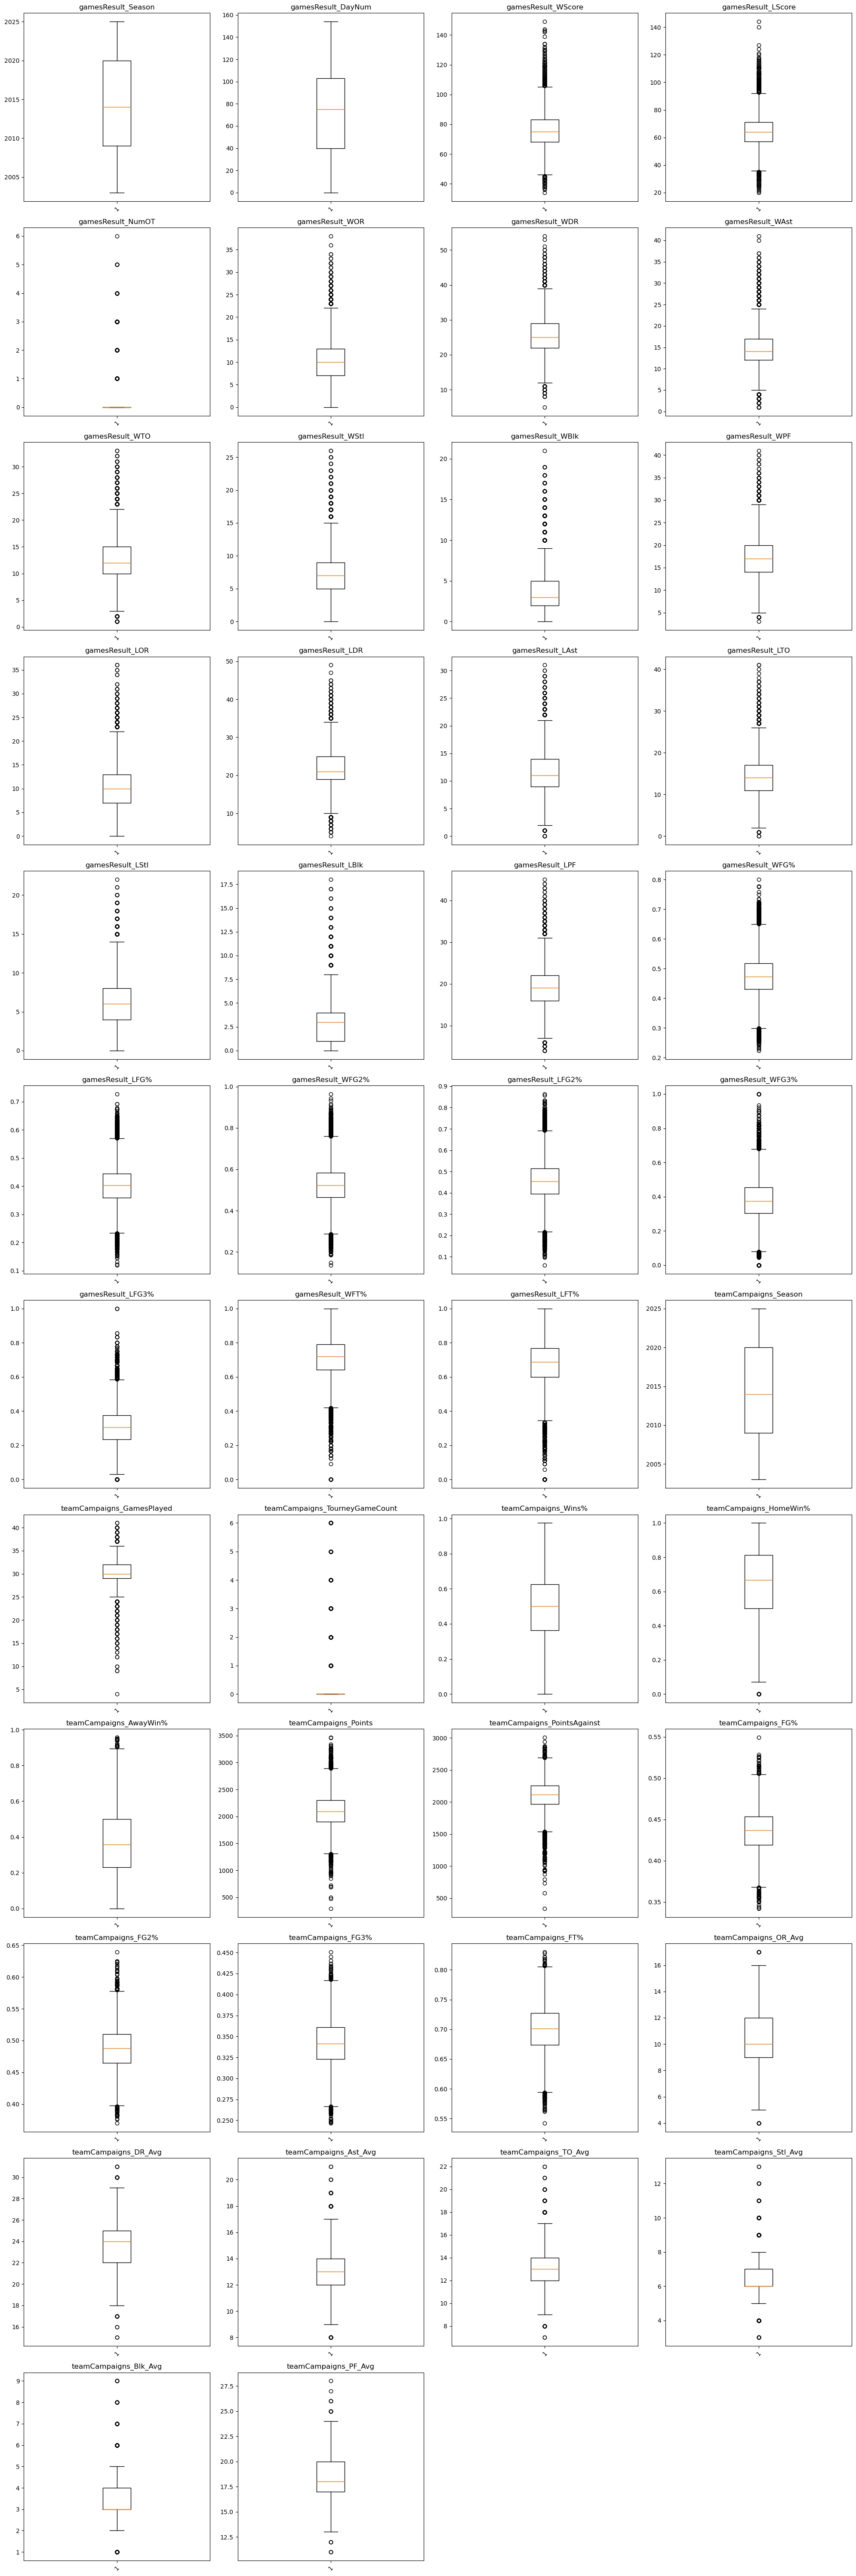

In [270]:
n_cols = 4
n_rows = int(np.ceil(len(numerics.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Plota cada boxplot
i = 0
for i, col in enumerate(numerics.columns):
    axes[i].boxplot(numerics[col].dropna())
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=45)

    # Remove eixos extras, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("boxPlots.png", dpi=300, bbox_inches='tight')
plt.show()

### 3.2 Identificação dos atributos binários, nominais e ordinais

Inicialmente iremos juntar todos os atributos não numéricos de todos os dataframes em um só

Os dataframes de times, chaveamentos e classificação inicial não serão considerados por não terem atributos não numéricos relevantes.

In [260]:
seasons_nonNum = seasons.drop("DayZero", axis=1).select_dtypes(exclude='number').add_prefix('seasons_').reset_index(drop=True)
gamesResult_nonNum = gamesResult_FGpercent.select_dtypes(exclude='number').add_prefix('gamesResult_').reset_index(drop=True)
teamCampaigns_nonNum = teamCampaigns.select_dtypes(exclude='number').add_prefix('teamCampaigns_').reset_index(drop=True)

nonNumerics = pd.concat([seasons_nonNum, gamesResult_nonNum, teamCampaigns_nonNum], axis=1)

nonNumerics.count()


seasons_RegionW          41
seasons_RegionX          41
seasons_RegionY          41
seasons_RegionZ          41
gamesResult_GType    120264
gamesResult_WLoc     120264
dtype: int64

#### Mostrar a distribuição de cada possível valor dos atributos

In [261]:
for col in nonNumerics.columns:
    # A recorrência de cada valor possível de forma ordenada e normalizada
    print(nonNumerics[col].dropna().value_counts(normalize=True).sort_values())
    print()

seasons_RegionW
NA1            0.024390
Albuquerque    0.024390
Atlanta        0.048780
East           0.902439
Name: proportion, dtype: float64

seasons_RegionX
NA2          0.024390
Oakland      0.024390
Chicago      0.024390
Phoenix      0.024390
Southeast    0.097561
South        0.219512
West         0.292683
Midwest      0.292683
Name: proportion, dtype: float64

seasons_RegionY
EastRutherford    0.024390
NA3               0.024390
Minneapolis       0.024390
Austin            0.024390
Southeast         0.146341
South             0.170732
Midwest           0.585366
Name: proportion, dtype: float64

seasons_RegionZ
StLouis         0.024390
Southwest       0.024390
WashingtonDC    0.024390
Syracuse        0.024390
NA4             0.024390
Southeast       0.097561
South           0.170732
West            0.609756
Name: proportion, dtype: float64

gamesResult_GType
Tourney    0.011491
Regular    0.988509
Name: proportion, dtype: float64

gamesResult_WLoc
N    0.113492
A    0.305544
H 

### 3.3 Identificando os valores ausentes de cada atributo

In [262]:
teams.isnull().sum()

TeamID           0
TeamName         0
FirstD1Season    0
LastD1Season     0
dtype: int64

In [263]:
seasons.isnull().sum()

Season     0
DayZero    0
RegionW    0
RegionX    0
RegionY    0
RegionZ    0
dtype: int64

In [264]:
tourneySeeds.isnull().sum()

Season    0
Seed      0
TeamID    0
dtype: int64

In [265]:
tourneySlots.isnull().sum()

Season        0
Slot          0
StrongSeed    0
WeakSeed      0
dtype: int64

In [266]:
gamesResult_FGpercent.isnull().sum()

Season     0
DayNum     0
GType      0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
WFG%       0
LFG%       0
WFG2%      0
LFG2%      0
WFG3%      0
LFG3%      0
WFT%       0
LFT%       0
dtype: int64

In [267]:
teamCampaigns.isnull().sum()

Season              0
TeamID              0
GamesPlayed         0
TourneyGameCount    0
Wins%               0
HomeWin%            0
AwayWin%            0
Points              0
PointsAgainst       0
FG%                 0
FG2%                0
FG3%                0
FT%                 0
OR_Avg              0
DR_Avg              0
Ast_Avg             0
TO_Avg              0
Stl_Avg             0
Blk_Avg             0
PF_Avg              0
dtype: int64

### 3.4 Identificando os outliers e valores unicos

In [268]:
UnicsOutliers_dataframe = {
    "Atributo": [],
    "Outlier/Únicos": [],
    "%": []
}

for col in numerics.columns:
    UnicsOutliers_dataframe["Atributo"].append(col)
    UnicsOutliers_dataframe["Outlier/Únicos"].append(len(outliers[col]))
    UnicsOutliers_dataframe["%"].append((len(outliers[col]) / numerics[col].dropna().count()) * 100)

for col in nonNumerics.columns:
    UnicsOutliers_dataframe["Atributo"].append(col)
    unics = nonNumerics[col].nunique(dropna=True)
    UnicsOutliers_dataframe["Outlier/Únicos"].append(unics)
    UnicsOutliers_dataframe["%"].append((unics / nonNumerics[col].dropna().count()) * 100)

UnicsOutliers_dataframe = pd.DataFrame(UnicsOutliers_dataframe)
UnicsOutliers_dataframe

,Atributo,Outlier/Únicos,%
0,gamesResult_Season,0,0.000000
1,gamesResult_DayNum,0,0.000000
2,gamesResult_WScore,1140,0.947915
3,gamesResult_LScore,1263,1.050190
4,gamesResult_NumOT,6833,5.681667
5,gamesResult_WOR,753,0.626123
6,gamesResult_WDR,620,0.515532
7,gamesResult_WAst,3063,2.546897
8,gamesResult_WTO,1655,1.376139
9,gamesResult_WStl,1189,0.988658


### 3.5 Analisando a correlação dos atributos numéricos

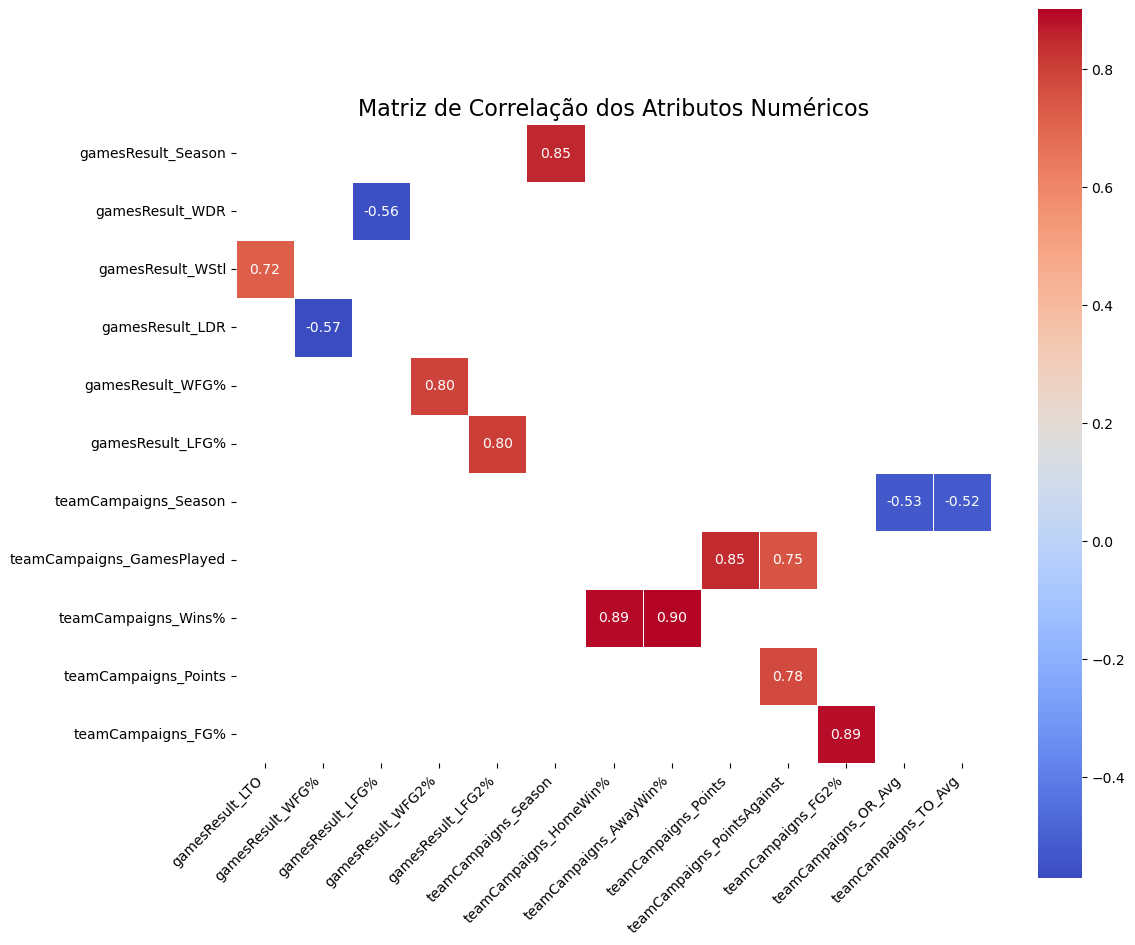

In [269]:
corr = numerics.corr()

# Zera a diagonal e correlações fracas para facilitar visualização
filtered_corr = corr.mask(np.tril(np.ones(corr.shape), k=0).astype(bool))
strong_corr = filtered_corr[(filtered_corr >= 0.7) | (filtered_corr <= -0.5)]
strong_corr = strong_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

plt.figure(figsize=(12, 10))

# Cria o heatmap
sns.heatmap(strong_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Título e ajustes
plt.title('Matriz de Correlação dos Atributos Numéricos', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Exibe o gráfico
plt.savefig("correlacao_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


---

### 🟥 Correlações Fortemente Positivas (≥ 0.75)

| Atributo 1                          | Atributo 2                          | Correlação | Interpretação                                                                                  |
|------------------------------------|-------------------------------------|------------|------------------------------------------------------------------------------------------------|
| `teamCampaigns_Wins%`              | `teamCampaigns_Points`             | **0.90**   | Times que vencem mais tendem a pontuar mais.                                                   |
| `teamCampaigns_Wins%`              | `teamCampaigns_FG%`                | **0.89**   | Aproveitamento de arremessos influencia diretamente as vitórias.                               |
| `teamCampaigns_Points`             | `teamCampaigns_FG2%`               | **0.85**   | Arremessos de 2 pontos impactam diretamente na pontuação.                                      |
| `gamesResult_Season`              | `gamesResult_WStl`                 | **0.85**   | Aumentaram o numéro de roubos de bola em times vitoriosos ao passar das temporadas             |
| `gamesResult_WFG%`                | `gamesResult_LFG%`                 | **0.80**   | Alta consistência entre o aproveitamento de arremessos nos times vitoriosos e times perdedores |
| `teamCampaigns_GamesPlayed`        | `teamCampaigns_Wins%`              | **0.75**   | Mais jogos, maior chance de vitórias.                                                          |

---

### 🔷 Correlações Fortemente Negativas (≤ -0.5)

| Atributo 1                          | Atributo 2                          | Correlação | Interpretação                                                                                |
|------------------------------------|-------------------------------------|------------|----------------------------------------------------------------------------------------------|
| `gamesResult_WDR`                  | `gamesResult_LDR`                  | **-0.56**  | Rebotes defensivos em times vitoriosos inversamente proporcionar do que em times perdedores. |
| `teamCampaigns_Season`             | `teamCampaigns_OR_Avg`            | **-0.53**  | Rebotes ofensivos diminuíram ao longo das temporadas.                                        |
| `teamCampaigns_OR_Avg`             | `teamCampaigns_TO_Avg`            | **-0.52**  | Mais rebotes ofensivos associados a menos turn overs.                                        |

---
